In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

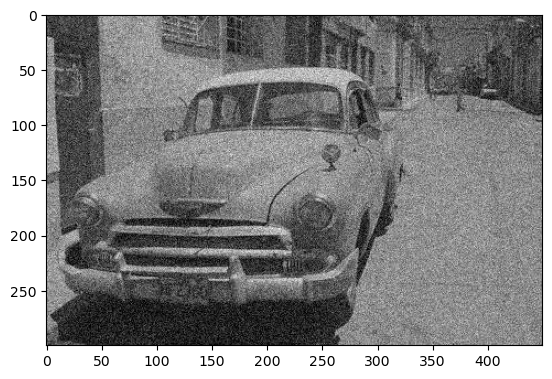

In [6]:
image = cv2.imread(r"C:\Users\DS17\Desktop\IVP 011\Image Restoration\car_noise.png", cv2.IMREAD_GRAYSCALE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
image.shape

(300, 450)

**Image Restoration techniques**

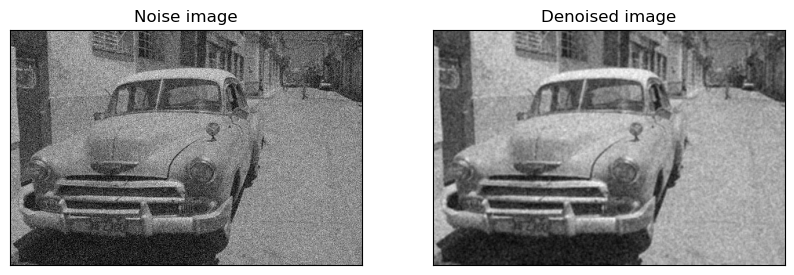

In [8]:
# Mean filters
denoised_mean_image = cv2.blur(image, (3,3))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(denoised_mean_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

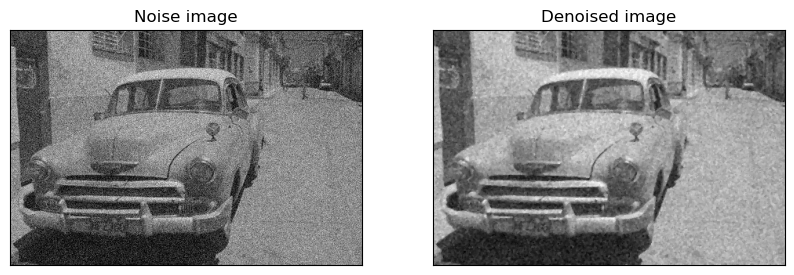

In [10]:
# Median filters
denoised_median_image = cv2.medianBlur(image, 3) # kernel_size=3x3

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(denoised_median_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

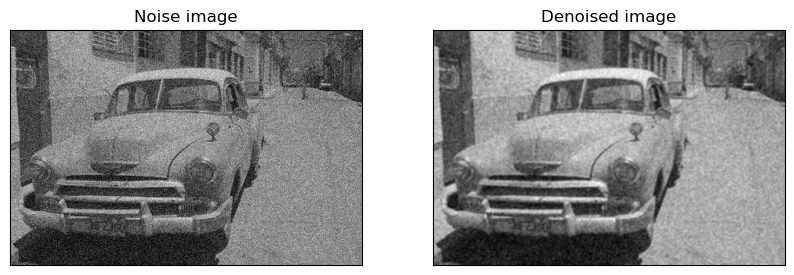

In [12]:
# Gaussian filters
denoised_gauss_image = cv2.GaussianBlur(image, (3,3), sigmaX=1.5)

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(denoised_gauss_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

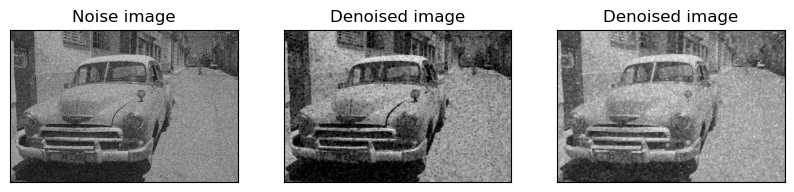

In [13]:
# Min/Max filters
# Apply Min Filter (Kernel size = 3x3)
min_filtered_image = cv2.erode(image, np.ones((3, 3)))

# Apply Max Filter (Kernel size = 3x3)
max_filtered_image = cv2.dilate(image, np.ones((3, 3)))

plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(min_filtered_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(max_filtered_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
# Adding salt and pepper noise
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    noise_pixel = image.size
    
    num_salt = int(noise_pixel*salt_prob)
    salt_coords = [np.random.randint(0,i-1,num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    
    num_pepper = int(noise_pixel*pepper_prob)
    pepper_coords = [np.random.randint(0,i-1,num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy_image

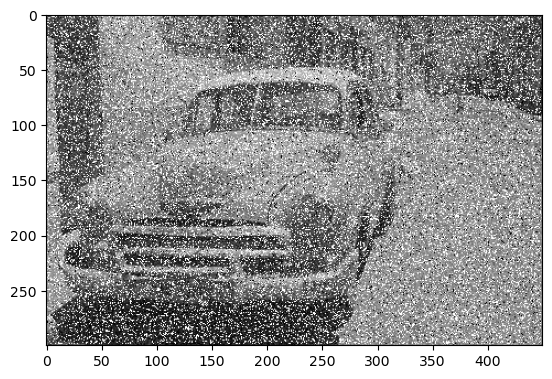

In [17]:
sp_image = add_salt_pepper_noise(image, salt_prob=0.2, pepper_prob=0.03)
plt.imshow(sp_image, cmap='gray')
plt.show()

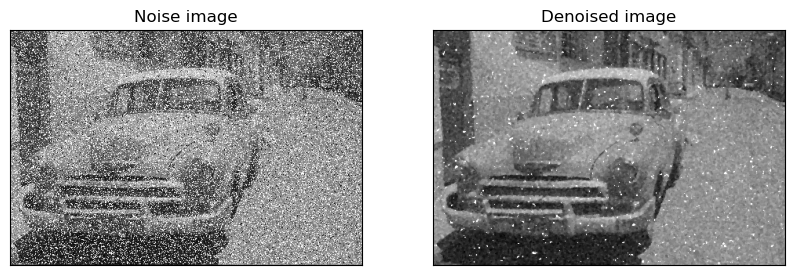

In [23]:
# Applying filters to remove noise/ to restore image
# Median filter
denoised_median_image = cv2.medianBlur(sp_image, 3) # kernel_size=3x3
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(sp_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(denoised_median_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

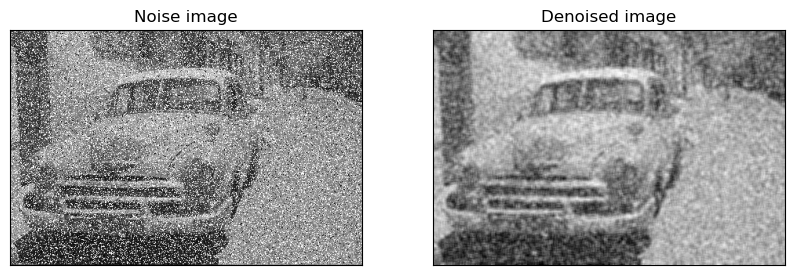

In [26]:
# Mean filter
denoised_mean_image = cv2.blur(sp_image, (5,5))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(sp_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(denoised_mean_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

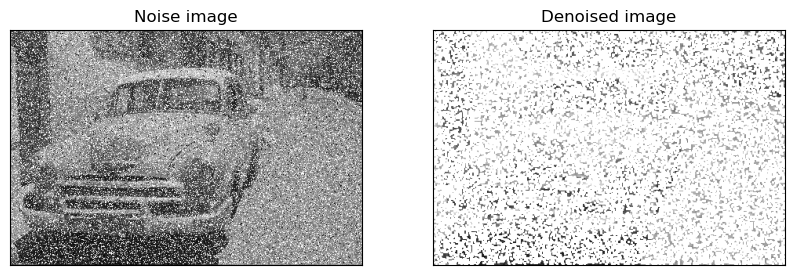

In [29]:
max_filtered_image = cv2.dilate(sp_image, np.ones((3, 3)))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(sp_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(max_filtered_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

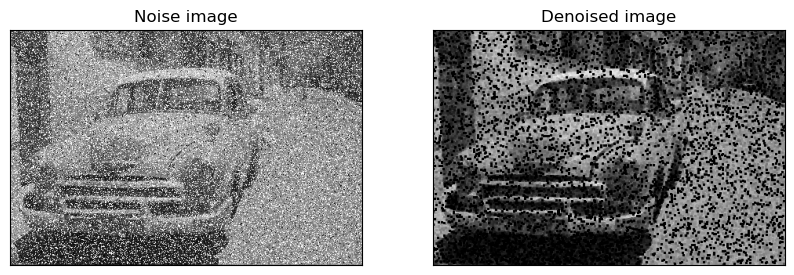

In [34]:
min_filtered_image = cv2.erode(sp_image, np.ones((3, 3)))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(sp_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(min_filtered_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

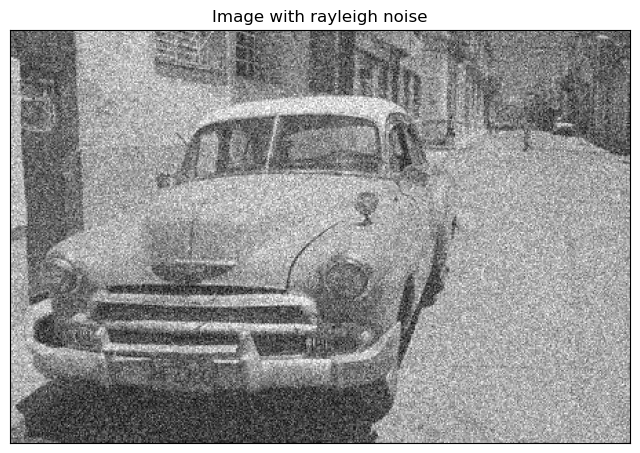

In [35]:
# Rayleigh noise
sigma = 25
rayleigh_noise = np.random.rayleigh(sigma, image.shape)
rayleigh_noisy_image = np.clip(image + rayleigh_noise, 0, 255).astype(np.uint8)
plt.figure(figsize=(8,6))
plt.title("Image with rayleigh noise"), plt.xticks([]), plt.yticks([])
plt.imshow(rayleigh_noisy_image, cmap='gray')
plt.show()

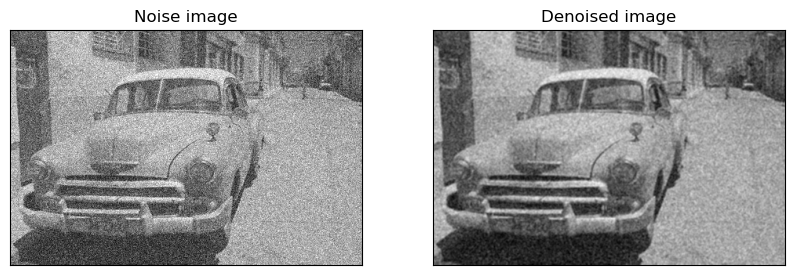

In [36]:
# Gaussian filter
gauss_image = cv2.GaussianBlur(rayleigh_noisy_image, (3,3), 1.5) # sigmaX=1.5

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(rayleigh_noisy_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(gauss_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

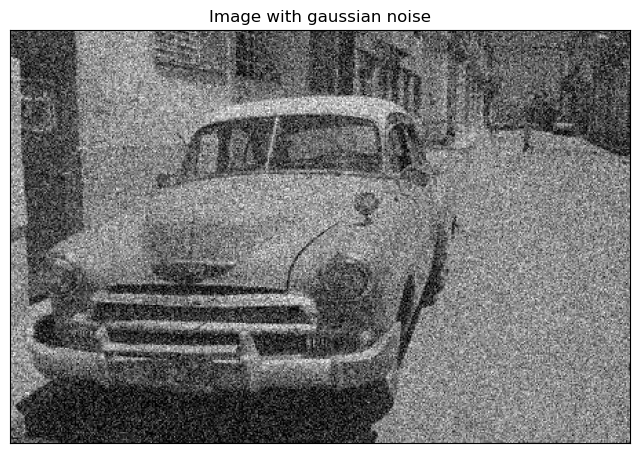

In [37]:
# Gaussian noise
mean = 0
sigma = 25
gauss_noise = np.random.normal(mean, sigma, image.shape)
noisy_image = np.clip(image + gauss_noise, 0, 255).astype(np.uint8)
plt.figure(figsize=(8,6))
plt.title("Image with gaussian noise"), plt.xticks([]), plt.yticks([])
plt.imshow(noisy_image, cmap='gray')
plt.show()

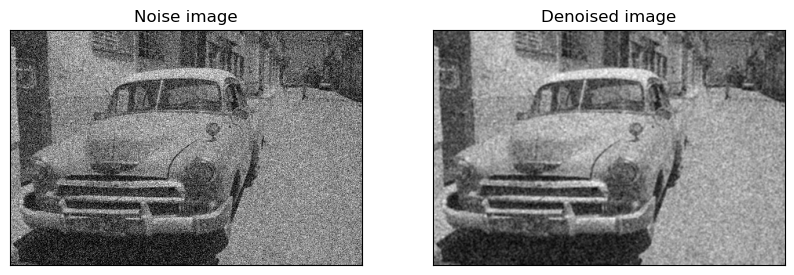

In [38]:
gauss_image = cv2.GaussianBlur(noisy_image, (3,3), 1.5) # sigmaX=1.5

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(gauss_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

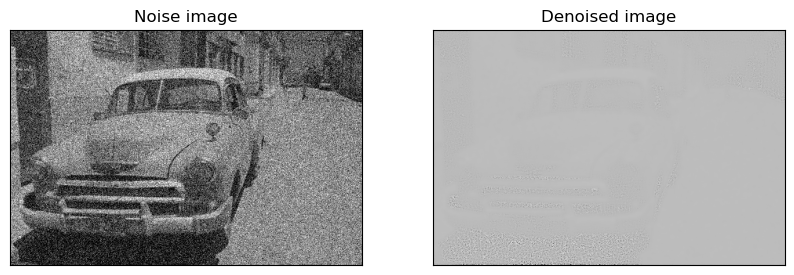

In [44]:
from scipy.signal import wiener

# Apply Wiener filter to the noisy image
denoised_image = wiener(noisy_image, (5, 5))  # Kernel size is 5x5

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

In [53]:
def wiener_filter(image, kernel_size=3):
    # Calculate local variance of the noisy image
    mean = cv2.blur(image, (kernel_size, kernel_size))
    squared_mean = cv2.blur(image**2, (kernel_size, kernel_size))
    variance = squared_mean - mean**2
    
    # Estimate the noise variance (this is an approximation, but often a good assumption)
    noise_variance = np.var(image) * 1.7  # You can tweak this parameter
    
    # Apply the Wiener filter
    wiener_image = mean + (variance / (variance + noise_variance)) * (image - mean)
    
    return np.clip(wiener_image, 0, 255).astype(np.uint8)

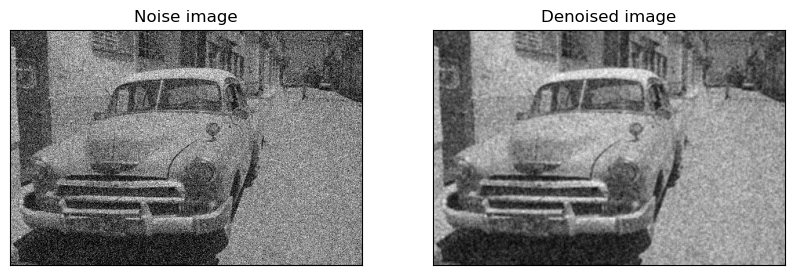

In [54]:
wiener_image = wiener_filter(noisy_image)

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(wiener_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()

In [55]:
def wiener_filter_frequency_domain(noisy_image, noise_psd, kernel_size=5):
    # Perform Fourier Transform of the noisy image
    noisy_image_fft = np.fft.fft2(noisy_image)
    
    # Shift zero frequency to center of the spectrum
    noisy_image_fft_shifted = np.fft.fftshift(noisy_image_fft)
    
    # Compute the power spectral density of the noisy image
    noisy_psd = np.abs(noisy_image_fft_shifted)**2
    
    # Wiener filter in the frequency domain
    filter_wiener = noisy_psd / (noisy_psd + noise_psd)
    
    # Apply the Wiener filter
    restored_fft_shifted = noisy_image_fft_shifted * filter_wiener
    
    # Inverse FFT to get the restored image
    restored_fft = np.fft.ifftshift(restored_fft_shifted)
    restored_image = np.fft.ifft2(restored_fft)
    
    # Take the real part and clip to valid range [0, 255]
    restored_image = np.real(restored_image)
    restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)
    
    return restored_image


In [57]:
noise_psd = np.abs(np.fft.fftshift(np.fft.fft2(gauss_noise)))**2

# Apply the Wiener filter in the frequency domain
denoised_image = wiener_filter_frequency_domain(noisy_image, noise_psd)

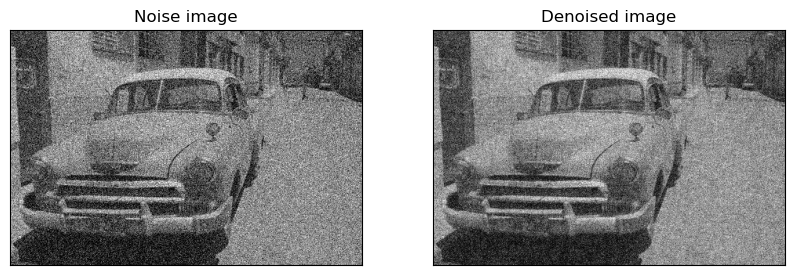

In [58]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noise image"), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.show()